In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Data

In [99]:
samples = 1000
features = 10

np.random.seed(42)

data = np.random.randn(samples, features)

weights = np.random.randn(features)

labels = (data.dot(weights) + np.random.randn(samples)*0.5) > 0

labels = labels.astype(int)

# Logistic regression

In [100]:
class logistic_regression:
    def __init__(self, learning_rate = 0.01, epochs = 100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))


    def bce(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)


    def forward(self, x):
        pred = x.dot(self.weights) + self.bias
        return self.sigmoid(pred)


    def fit(self, data, labels):
        samples, features = data.shape
        self.weights = np.zeros(features)*0.1
        self.bias = 0

        for epoch in range(self.epochs):
            pred_labels = self.forward(data)
            loss = self.bce(labels, pred_labels)
            self.losses.append(loss)

            dz = pred_labels - labels

            dw = (1/samples) * (data.T).dot(dz)
            db = (1/samples) * np.sum(dz)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, x, threshold=0.6):
        y_pred = x.dot(self.weights) + self.bias
        y_label = self.sigmoid(y_pred)

        y_label = [1 if i > threshold else 0 for i in y_label]

        return np.array(y_label)


    def accuracy(self, y_true, y_pred):
        correct_predictions = np.sum(y_true == y_pred)
        accuracy = correct_predictions / len(y_true)
        return accuracy

In [101]:
model = logistic_regression(0.08, 1000)

model.fit(data, labels)

preds = model.predict(data)

Accuracy : 0.939


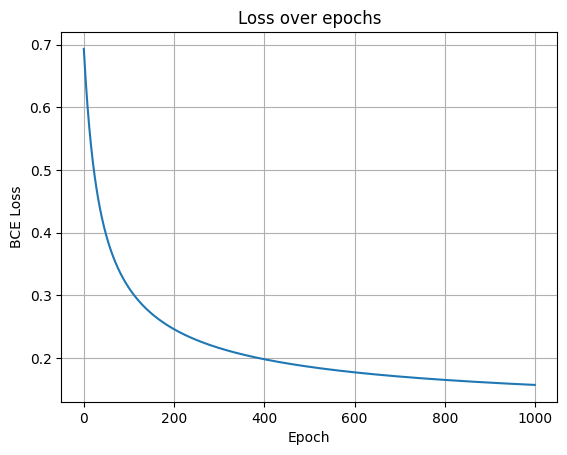

In [104]:
acc = model.accuracy(labels, preds)

print(f"Accuracy : {acc}")

plt.plot(range(len(model.losses)), model.losses)
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.title('Loss over epochs')
plt.grid(True)
plt.show()
